# **1. Import Library**

Untuk menjalankan proyek ini, terdapat beberapa library yang harus diimpor, yaitu:
*   Pandas: Untuk manipulasi dan analisis data.
*   NumPy: Untuk operasi numerik dasar.
*   Matplotlib: Untuk visualisasi data.
*   Seaborn: Untuk visualisasi data
*   Scikit-learn: Untuk preprocessing data, pemodelan machine learning, dan evaluasi model.
*  Imbalanced-learn: Untuk menangani data yang tidak seimbang, khususnya menggunakan SMOTE.

In [ ]:
!pip install -U scikit-learn imbalanced-learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 70.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


# **2. Data Loading**

Selanjutnya kita akan load dataset yang ada di Kaggle: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set). Dataset tersebut memiliki 768 baris dan 9 kolom. Berikut adalah fitur-fitur yang ada pada dataset:


*   Pregnancies: Jumlah kehamilan
*   Glucose: Konsentrasi glukosa plasma dua jam setelah tes toleransi glukosa oral
*   BloodPressure: Tekanan darah diastolik (mm Hg)
*   SkinThickness: Ketebalan kulit triseps (mm)
*   Insulin: Kadar insulin (mu U/ml)
*   BMI: Indeks massa tubuh
*   DiabetesPedigreeFunction: Fungsi silsilah diabetes (faktor keturunan dan riwayat diabetes dalam keluarga)
*   Age: Usia (tahun)
*   Outcome: Target variabel kelas (0 atau 1)





In [ ]:
diabetes_df = pd.read_csv("/kaggle/input/diabetes-data-set/diabetes.csv")
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# **3. Exploratory Data Analysis**

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan. Beberapa tahapan EDA yang akan dilakukan adalah pemahaman terhadap struktur data, analisis setiap fitur, pengecekan data duplikat dan nilai null, analisis univariate variabel target, serta analisis distribusi, outlier, dan korelasi data.

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Terdapat 768 row data dan 9 fitur pada dataset yang digunakan. Ada 7 fitur dengan tipe data integer dan 2 fitur dengan tipe data float. Dataset ini berisi data numerikal semuanya.

## Eksplor Parameter Statistik

In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Insights:**

- Terdapat nilai 0 di beberapa kolom penting seperti Glucose, BloodPressure, SkinThickness, Insulin, padahal kolom tersebut tidak mungkin bernilai 0. Ini berarti ada data yang mungkin perlu ditangani nantinya.

- Rata-rata 'Glucose' mencapai sekitar 120 dengan variasi cukup besar. Ini dapat menandakan bahwa tingginya kadar gula sangat berpengaruh pada 'Outcome'.

- Insulin memiliki nilai max yang sangat besar yaitu 846. Ada kemungkinan disini terdapat outlier.

- BMI rata-rata mencapai 32 dan ini menandakan bahwa terdapat kelebihan berat badan atau obesitas.

- Usia rata-rata 33 tahun dari rentang umur 21 sampai 81 tahun. Jadi faktor usia cukup bervariasi.

## Univariate Analysis Terhadap Target 'Outcome'

In [ ]:
diabetes_df.groupby(by='Outcome').agg({
    "Pregnancies": ["mean","std"],
    "Glucose": ["mean","std"],
    "BloodPressure": ["mean","std"],
    "SkinThickness": ["mean","std"],
    "Insulin": ["mean","std"],
    "BMI": ["mean","std"],
    "DiabetesPedigreeFunction": ["mean","std"],
    "Age": ["mean","std"]
})

Pregnancies               Glucose            BloodPressure             \
               mean       std        mean        std          mean        std   
Outcome                                                                         
0          3.298000  3.017185  109.980000  26.141200     68.184000  18.063075   
1          4.865672  3.741239  141.257463  31.939622     70.824627  21.491812   

        SkinThickness                Insulin                    BMI            \
                 mean        std        mean         std       mean       std   
Outcome                                                                         
0           19.664000  14.889947   68.792000   98.865289  30.304200  7.689855   
1           22.164179  17.679711  100.335821  138.689125  35.142537  7.262967   

        DiabetesPedigreeFunction                  Age             
                            mean       std       mean        std  
Outcome                                                           
0                       0.429734  0.299085  31.190000  11.667655  
1                       0.550500  0.372354  37.067164  10.968254

**Insight:**
- Pregnancies: Pasien diabetes cenderung punya jumlah kehamilan lebih banyak, yang mungkin menandakan bahwa perempuan yang hamil cenderung mengalami diabetes.
- Glucose: Pasien diabetes punya rata-rata kadar gula 141 yang jauh lebih tinggi dibanding yang tidak memiliki diabetes (109), sehingga dapat disimpulkan kadar gula tinggi dapat mengakibatkan diabetes.
- BloodPressure: Rata-rata dari pasien yang terkena diabetes dengan yang tidak diabetes tidak terlalu jauh (dari 70 ke 68). Kemungkinan besar faktor tekanan darah tidak terlalu memiliki pengaruh dalam diabetes.
- Insulin dan SkinThickness: Rata-ratanya juga lebih tinggi pada pasien diabetes yang menandakan bahwa tingginya level insulin berkontribusi terhadap resiko terkena diabetes atau adanya kadar yang abnormal (harus ditangani).
- BMI: Rata-rata BMI pasien diabetes 35.1, sedangkan non-diabetes 30.3. Ini berarti berat badan berhubungan kuat dengan diabetes.
- DiabetesPedigreeFunction: Nilai lebih tinggi ada pada kelas diabetes yang artinya riwayat keluarga juga sangat berperan dalam resiko penyakit diabetes.
- Age: Pasien diabetes cenderung lebih tua (rata-rata 37 tahun) dibanding non-diabetes (rata-rata 31 tahun).







## Pengecekan Data Nil, Data Duplikat, dan Class Imbalance

In [ ]:
#Cek null values
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Insight:** Tidak ada data yang kosong/null.

In [ ]:
#Cek Data Duplikat
print("Terdapat ",diabetes_df.duplicated().sum(), "data duplikat.")

Terdapat 0 data duplikat.


**Insight:** Tidak ada data duplikat.

In [ ]:
#Cek apakah ada class imbalance
diabetes_df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

**Insight:** Terdapat class imbalance dimana kelas tidak diabetes memiliki 500 data, sedangkan kelas diabetes hanya memiliki 268 data. Ini akan ditangani nanti pada tahap preprocessing.

## Pendeteksian Outlier Dengan Boxplot

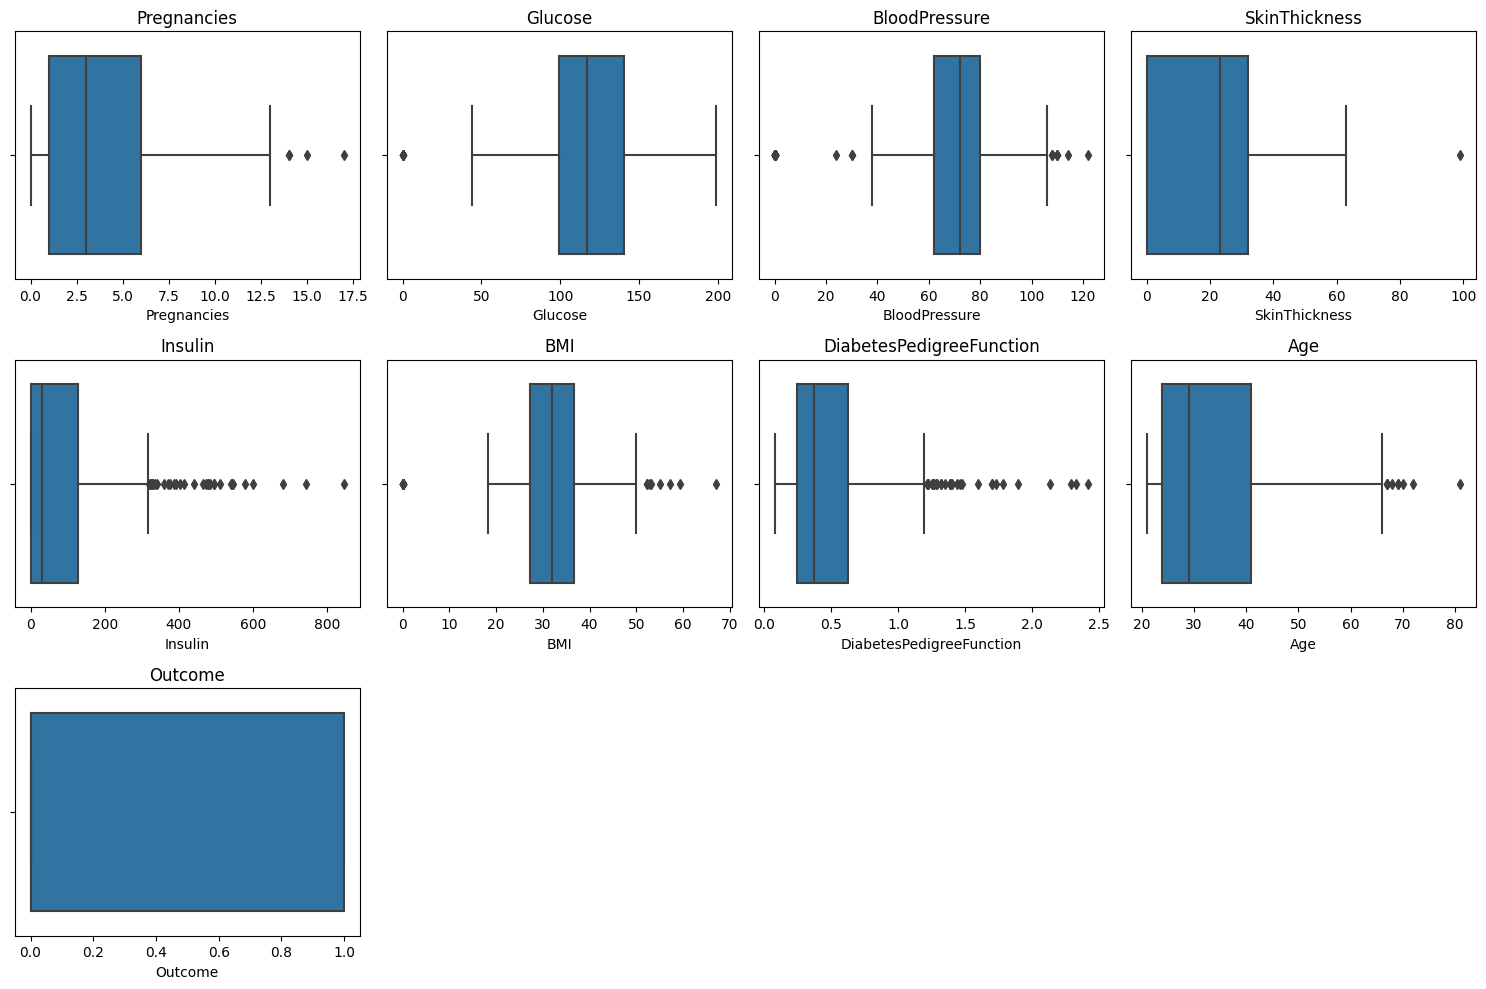

In [ ]:
plt.figure(figsize=(15,10))
for i, col in enumerate (diabetes_df.columns, 1):
    plt.subplot(3,4,i)
    sns.boxplot(x = diabetes_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

**Insight:** Terdapat cukup banyak outlier pada beberapa kolom seperti Insulin, DiabetesPedigreeFunction, SkinThickness, BMI, Age, dan BloodPressure. Outlier ini menandakan bahwa terdapat beberapa pasien dengan nilai yang jauh lebih tinggi dari mayoritas, seperti kadar insulin yang sangat tinggi, riwayat keturunan diabetes yang kuat, atau nilai tekanan darah dan BMI yang ekstrim. Kondisi ini menunjukkan adanya variasi yang tinggi sehingga perlu dianalisis lebih lanjut atau perlu ditangani saat preprocessing.

## Visualisasi Distribusi Dengan Pairplot

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


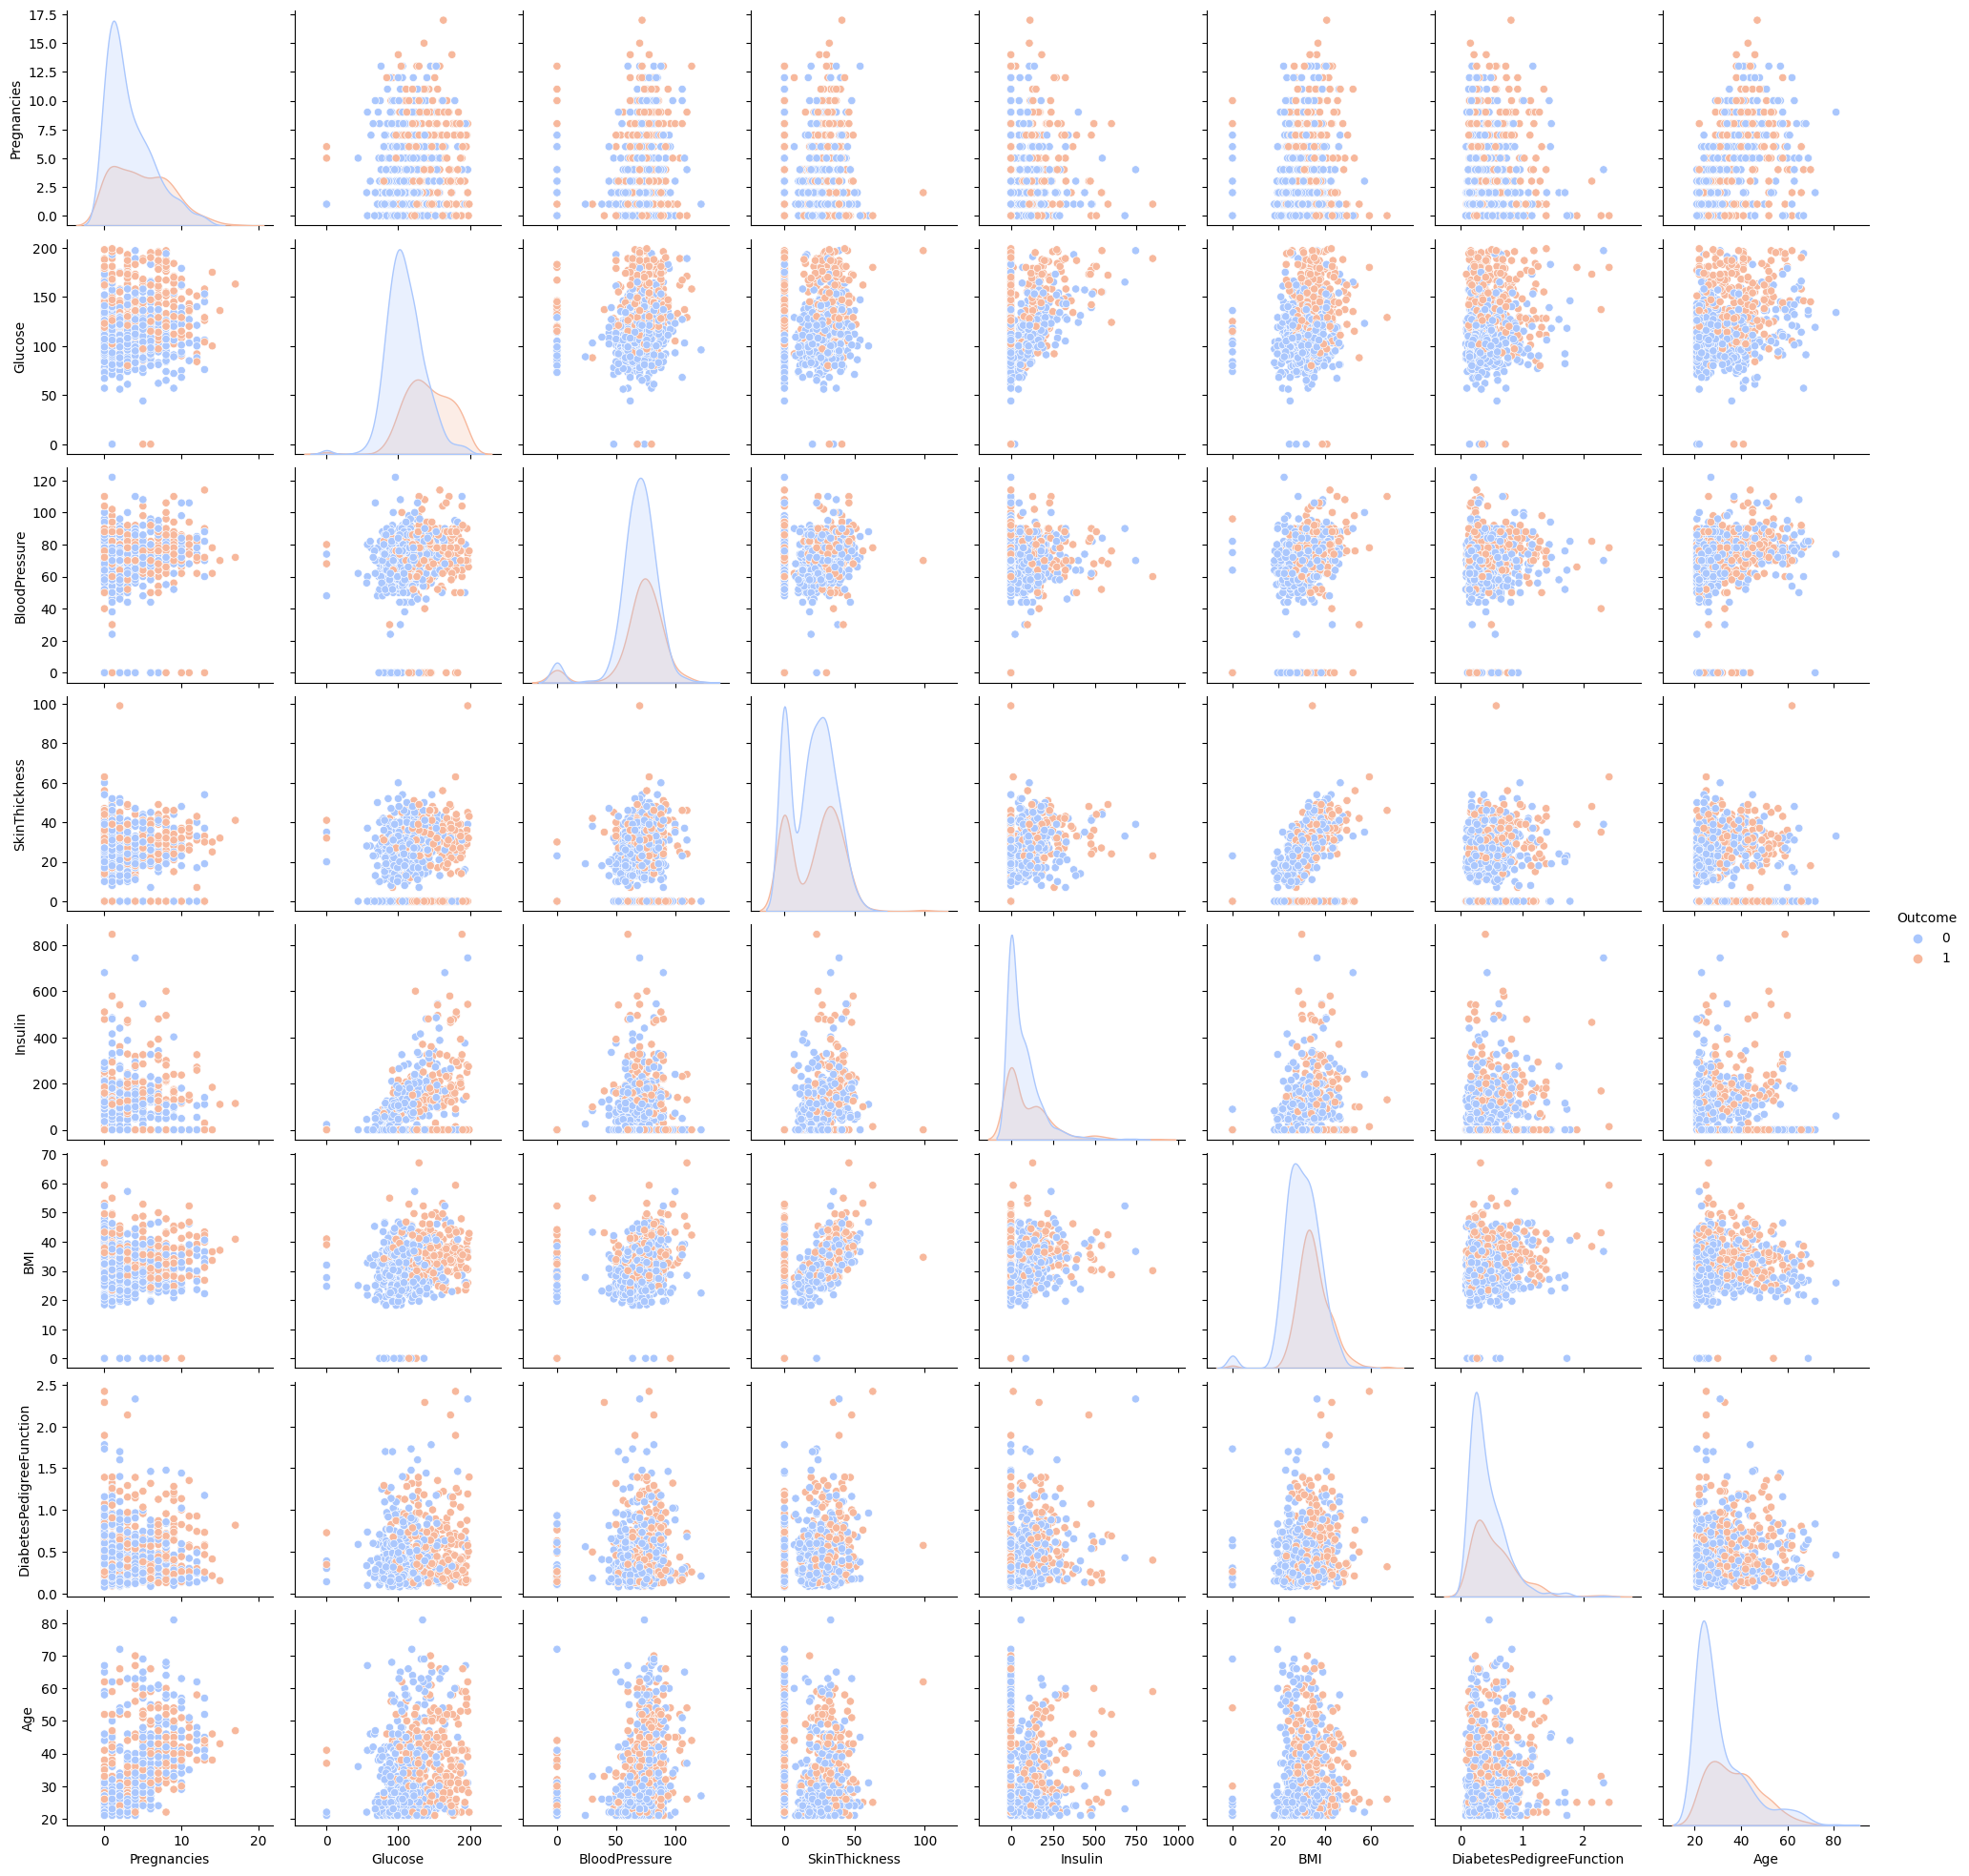

In [ ]:
sns.pairplot(diabetes_df, hue='Outcome', palette='coolwarm')
plt.show()

**Insight:** Distribusi antara pasien diabetes dan non-diabetes menunjukkan perbedaan yang cukup jelas pada fitur Glucose, BMI, dan Age, di mana pasien diabetes cenderung memiliki nilai yang lebih tinggi pada ketiga fitur tersebut. Selain itu, fitur Pregnancies juga menunjukkan kecenderungan lebih tinggi pada pasien diabetes. Perbedaan distribusi ini mengindikasikan bahwa faktor-faktor seperti kadar glukosa darah, indeks massa tubuh, usia, dan jumlah kehamilan berpotensi menjadi indikator penting dalam mendeteksi diabetes.

## Visualisasi Skewness pada Setiap Fitur

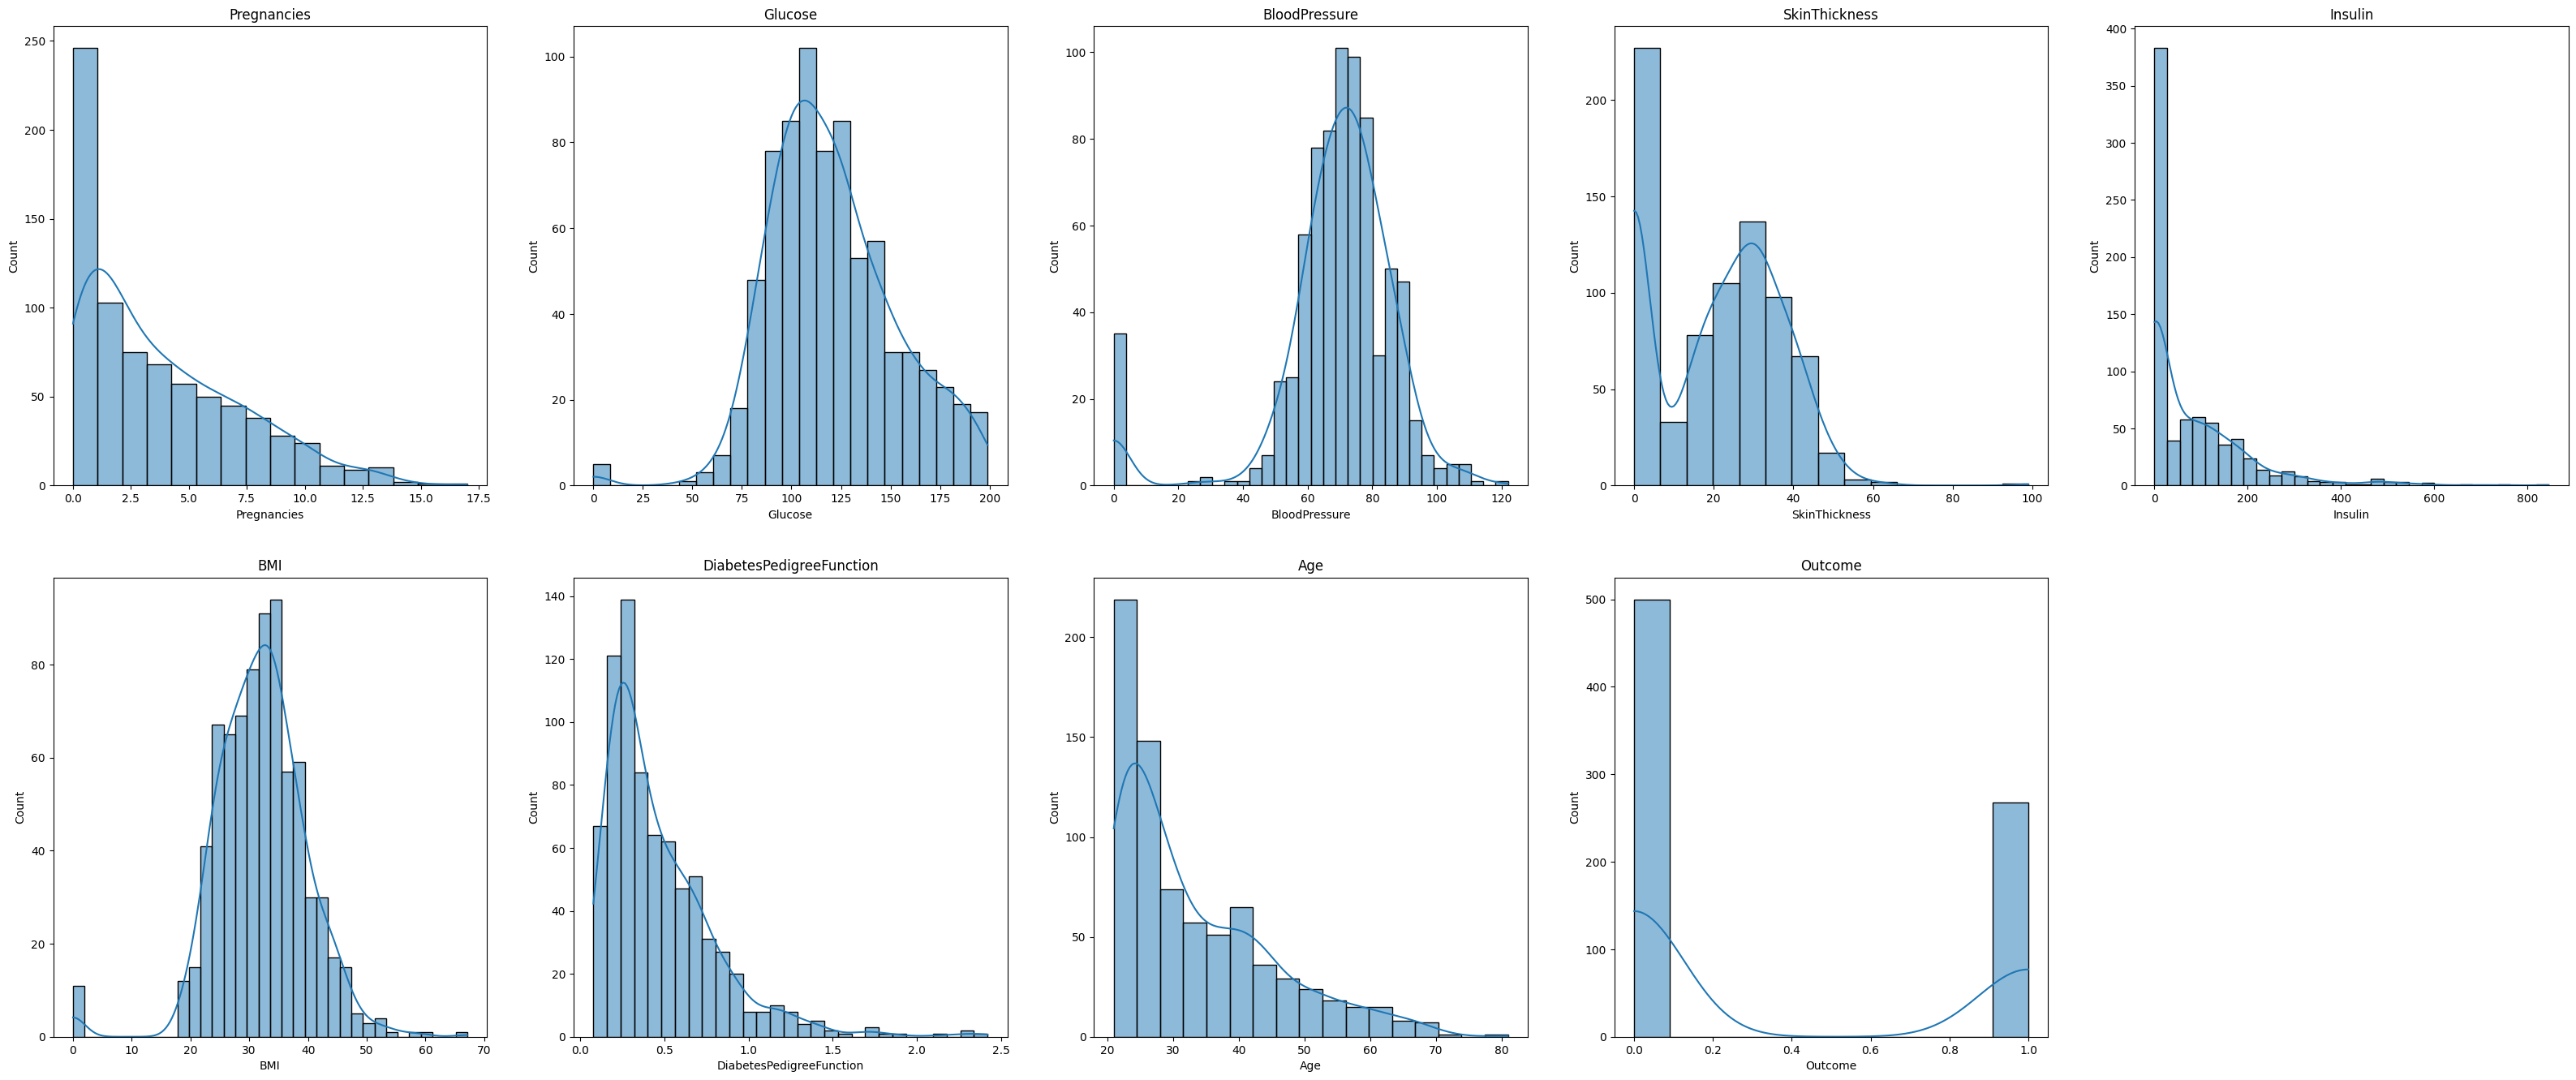

In [ ]:
cols = diabetes_df.columns
plt.figure(figsize=(40, 25))

for i, cols in enumerate (cols, 1):
    plt.subplot(3,5,i)
    sns.histplot(data=diabetes_df[cols], kde=True)
    plt.title(cols)

plt.show()

In [ ]:
diabetes_df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

**Insight:**
- Pregnancies: Distribusi positif dan miring ke kanan. Ini menandakan bahwa mayoritas data berada di nilai rendah dan ada beberapa nilai yang sangat tinggi.
- Glucose: Distribusi hampir simetris dengan sedikit skew ke kanan. Ini menandakan distribusi yang hampir seimbang namun masih ada beberapa nilai ekstrim yang lebih tinggi.
- BloodPressure: Distribusi negatif dan miring ke kiri yang berarti sebagian besar nilai berada di sisi kanan dengan beberapa nilai yang rendah.
- SkinThickness: Distribusi hampir simetris dengan sedikit skew ke kanan, namun masih cukup stabil.
- Insulin: Distribusi terlalu tinggi dan miring ke kanan. Hal ini dapat memengaruhi performa model jika tidak ditangani dengan baik.
- BMI: Distribusi negatif. Ini menunjukkan sebagian besar data berada pada nilai tinggi dengan beberapa nilai ekstrim rendah. Namun pada grafik di atas, bisa dibilang distribusi cukup bagus, hanya saja ada nilai abnormal yaitu BMI = 0.
- DiabetesPedigreeFunction: Distribusi tinggi dan cenderung ke kanan. Ini menandakan mayoritas data berada di nilai rendah dan ada beberapa nilai yang sangat tinggi.
- Age: Distribusi positif dan cenderung ke kanan yang berarti model bisa terpengaruh oleh nilai yang sanagt tinggi.
- Outcome: Distribusi positif dan menunjukkan bahwa kelas tidak-diabetes lebih dominan dibandingkan kelas diabetes.

## Visualisasi Korelasi antar Fitur

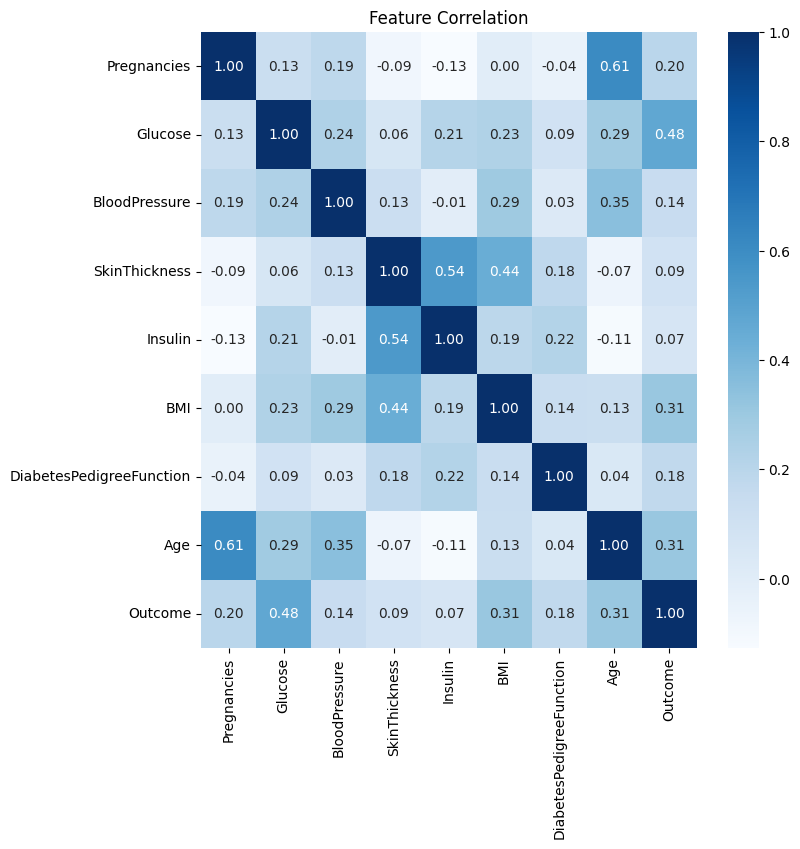

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(diabetes_df.corr(method="spearman"), annot=True, fmt='.2f', cmap='Blues',annot_kws={"size": 10})
plt.title('Feature Correlation', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
- Glucose memiliki korelasi tinggi dengan Outcome sebesar 0.48 yang menunjukkan hubungan kuat dengan kelas diabetes.

- Age dan BMI memiliki korelasi sedang dengan Outcome (sekitar 0.31) yang berarti keduanya cukup berpengaruh terhadap kelas diabetes (Outcome).

- Pregnancies, DiabetesPedigreeFunction, BloodPressure, SkinThickness, dan Insulin memiliki korelasi rendah dengan Outcome. Ini menunjukkan pengaruh yang lebih kecil terhadap kelas diabetes.

# **4. Data Preprocessing**

Data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data.

In [ ]:
#Drop BMI karena BMI tidak mungkin 0, dan jumlah baris yang bernilai 0 tidak banyak.
diabetes_df = diabetes_df[diabetes_df['BMI'] != 0]

In [ ]:
#Inisialisasi variabel invalid_cols karena kolom-kolom ini tidak mungkin bernilai 0
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']

#Ganti nilai 0 dengan median karena dari grafik distribusi ada terlalu banyak data invalid (bernilai 0) sehingga tidak bisa dihapus
for col in invalid_cols:
    diabetes_df.loc[:, col] = diabetes_df[col].replace(0, diabetes_df[col].median())

In [ ]:
#Tangani outliers dengan IQR
outlier_cols = [col for col in diabetes_df.columns if col != 'Outcome']

def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

diabetes_df = remove_outliers(diabetes_df, outlier_cols)

In [ ]:
#Reset Index
diabetes_df = diabetes_df.reset_index(drop=True)
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,37,33.6,0.627,50,1
1,1,85,66,29,37,26.6,0.351,31,0
2,8,183,64,23,37,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,23,37,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
603,9,89,62,23,37,22.5,0.142,33,0
604,2,122,70,27,37,36.8,0.340,27,0
605,5,121,72,23,112,26.2,0.245,30,0
606,1,126,60,23,37,30.1,0.349,47,1


In [ ]:
#Split data menjadi train & test set
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Standarisasi data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
#Oversampling karena ada class imbalance pada kelas 'Outcome'
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_s, y_train)

# **5. Modelling**

Pada tahap ini, akan dibangun model klasifikasi dengan 3 algoritma berbeda yaitu: Logistic Regression, Random Forest, dan kNN untuk mengklasifikasikan data ke kelas Outcome (Diabetes/Tidak Diabetes).

## Logistic Regression

Logistic Regression merupakan model yang cocok untuk masalah klasifikasi seperti binary classification (0 = tidak, 1 = iya). Model ini bekerja dengan memperkirakan probabilitas suatu kelas.
- Parameter: "**max_iter=100**" berarti jumlah maksimum iterasi untuk mencari konvergensi pas training.
- Kelebihan:

  a. Cepat dan simpel untuk baseline model klasifikasi.

  b. Hasilnya mudah diinterpretasi karena bisa lihat koefisien tiap fitur.

  c. Cukup bagus di dataset yang nggak terlalu besar.
- Kekurangan:

  a. Kurang cocok untuk data yang punya pola non-linear.

  b. Bisa sensitif terhadap fitur yang punya skala berbeda.

In [ ]:
#Logistic Regression
lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train_res, y_train_res)
y_pred_lr = lr_model.predict(X_test_s)

## Random Forest

Random Forest adalah algoritma berbasis ensemble yang terdiri dari banyak decision tree. Saat memprediksi, tiap pohon memberi “vote”, dan hasil akhirnya ditentukan dari mayoritas voting tersebut.

- Parameter: "**n_estimators=100**" berarti jumlah pohon dalam hutan, "**max_depth=10**" yang berarti kedalaman maksimal pada setiap pohon, "**random_state=42**" yang berarti nilai acuan untuk pengacakan data supaya tiap proses training itu konsisten.

- Kelebihan:

  a. Cocok buat data numerik dan kategorikal.

  b. Tidak mudah overfitting dan dapat menangani data non-linier.

  c. Bisa menemukan fitur mana yang paling penting (feature importance).

- Kekurangan:

  a.Lebih lambat dibanding model sederhana (karena banyak pohon).

  b. Kurang interpretasi dibanding model seperti Logistic Regression.

In [ ]:
#Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict(X_test_s)

## k-Nearest Neighbor

KNN merupakan model yang bekerja dengan mencari beberapa data yang paling dekat (dar jarak) ke data baru yang mau diprediksi. KNN cocok kalau data antar kelas punya jarak yang cukup jelas dan sudah diskalakan.
- Parameter: "**n_neighbors=10**" yang berarti model akan mempertimbangkan 10 tetangga terdekat saat menentukan kelas.
- Kelebihan:

  a. Simpel dan mudah dipahami.

  b. Cocok kalau data antar kelas cukup terpisah.

- Kekurangan:

  a. Prediksi bisa lambat jika terdapat banyak data.

  b. Performanya bisa jelek kalau datanya belum diskala atau banyak outlier/noise.

In [ ]:
#kNN
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train_res, y_train_res)
y_pred_knn = knn_model.predict(X_test_s)

# **6. Evaluation**

Disini, model akan dievaluasi dengan 4 metrik berbeda yaitu:
- Accuracy: metrik yang mengukur seberapa sering model memberikan prediksi yang benar, baik positif maupun negatif, dari seluruh data. Ini menunjukkan performa keseluruhan model secara umum. Rumus: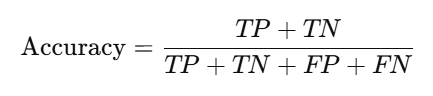

- Precision: menunjukkan hasil yang benar-benar positif dari semua kasus yang diprediksi positif oleh model. Metrik ini penting untuk mengukur seberapa akurat prediksi positif model, terutama jika false positive harus diminimalkan. Rumus: 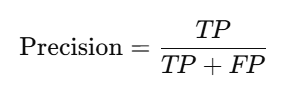

- Recall: mengukur banyaknya hasil yang berhasil dideteksi oleh model dari semua data yang sebenarnya positif. Recall penting ketika kita tidak ingin melewatkan kasus positif yang sebenarnya. Rumus:

  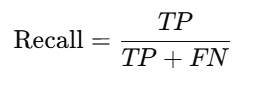

- F1 Score: rata-rata dari precision dan recall, yang memberikan nilai tunggal untuk menilai keseimbangan antara keduanya. F1 Score berguna saat kita ingin memastikan model tidak hanya akurat dalam menemukan positif, tapi juga meminimalkan kesalahan prediksi. Rumus:
  
  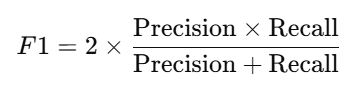



  Dimana:

      - TP = True Positive (benar positif)
      - TN = True Negative (benar negatif)
      - FP = False Positive (salah positif)
      - FN = False Negative (salah negatif)

In [ ]:
pred = [y_pred_lr, y_pred_rf, y_pred_knn]
names = ['Logistic Regression', 'Random Forest', 'KNN']

for name, y_pred in zip(names, pred):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1 Score:  {f1:.4f}\n")

Logistic Regression:
  Accuracy:  0.7951
  Precision: 0.6275
  Recall:    0.8421
  F1 Score:  0.7191

Random Forest:
  Accuracy:  0.8443
  Precision: 0.6939
  Recall:    0.8947
  F1 Score:  0.7816

KNN:
  Accuracy:  0.7377
  Precision: 0.5500
  Recall:    0.8684
  F1 Score:  0.6735



**Insight:**
- Logistic Regression
  - Accuracy 79.5% sudah cukup bagus yang berarti prediksi model lumayan akurat secara umum, namun masih bisa dikembangkan lagi.
  - Recall 84.2% menunjukkan bahwa model ini bagus dalam menangkap kasus positif (pasien diabetes).
  - Precision 62.7% menandakan bahwa masih ada cukup banyak false positive (kasus yang dikira diabetes padahal tidak) sehingga model harus ditrain lagi.
  - F1 Score 71.9% menunjukkan model ini cukup seimbang tapi masih bisa ditingkatkan.

- Random Forest
  - Accuracy 84.4% adalah akurasi yang paling tinggi dari semua model dan menandakan bahwa ini model paling akurat untuk klasifikasi penyakit diabetes.
  - Recall 89.4% juga paling tinggi yang artinya model ini paling baik dalam mendeteksi pasien diabetes.
  - Precision 69.4% menandakan hasil yang lebih baik dari Logistic Regression dan KNN.
  - F1 Score 78.2% juga paling tinggi yang berarti ini model yang paling seimbang antara precision dan recall.

- kNN
  - Accuracy 73.8% menunjukkan akurasi paling rendah dari semua model.
  - Recall 86.8% cukup tinggi yang berarti masih cukup bagus dalam menemukan kasus positif.
  - Precision 55.0% sangat rendah yang menandakan bahwa model sering salah mendeteksi orang sehat sebagai diabetes.
  - F1 Score 67.4% menunjukkan hasil yang lebih rendah dari dua model lain.

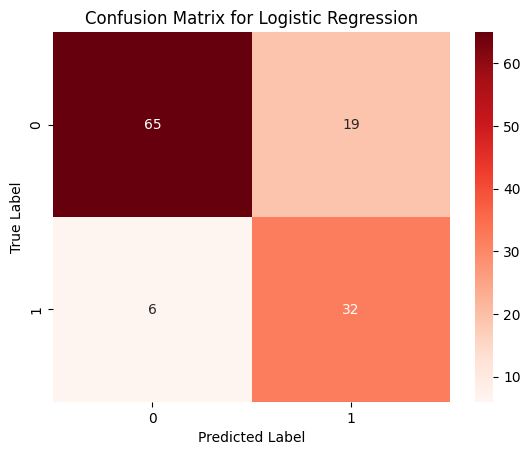

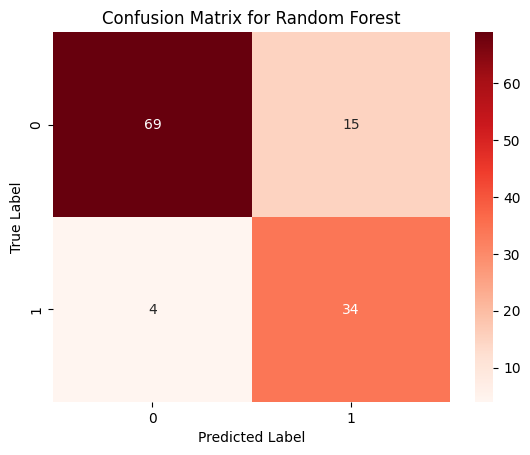

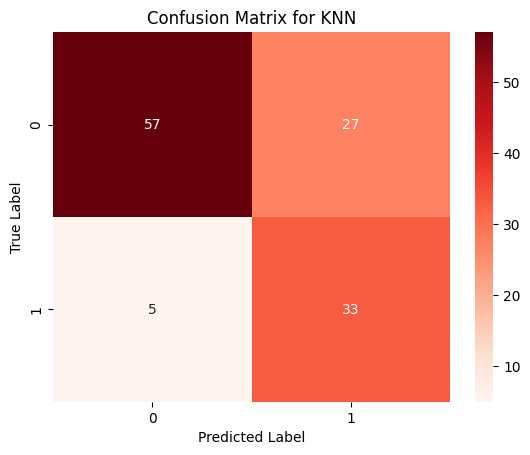

In [ ]:
for name, y_pred in zip(names, pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
                xticklabels=['0', '1'],
                yticklabels=['0', '1'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

**Insight:** Dari confusion matrix di atas, hasil yang paling bagus adalah model Random Forest dengan 103 label terprediksi dengan benar dan 19 label terprediksi dengan salah.

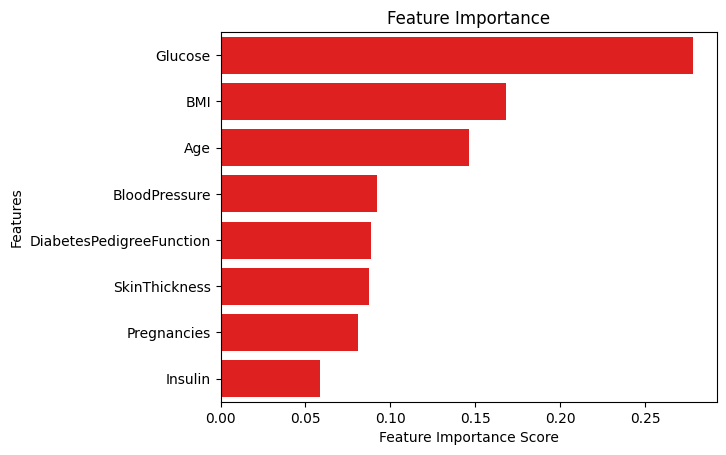

In [ ]:
feature_importance = rf_model.feature_importances_
features = diabetes_df.drop(['Outcome'], axis=1).columns
importance = pd.Series(feature_importance, index=features).sort_values(ascending=False)
sns.barplot(x=importance, y=importance.index, color='red')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.show()

**Insight:** 3 fitur yang paling berpengaruh pada model Random Forest adalah Glucose, BMI, dan Age, yang berarti 3 fitur ini memiliki pengaruh signifikan terhadap penyakit diabetes.

# **7. Conclusion**

- Model Random Forest menunjukkan performa terbaik dibandingkan model lain, dengan akurasi sebesar 84.4%, recall 89.4%, dan F1 Score tertinggi. Hal ini menunjukkan bahwa model ini tidak hanya akurat secara keseluruhan, tetapi juga sangat baik dalam mengenali pasien yang benar-benar menderita diabetes (dari recall yang tinggi).
- Dari confusion matrix Random Forest juga dapat dilihat bahwa ada 103 label terprediksi dengan benar dan 19 label terprediksi dengan salah.
- Untuk fitur yang paling signifikan pada penyakit diabetes adalah Glucose (kadar gula darah), BMI (indeks massa tubuh), dan Age (usia)